In [1]:
x=2
y=3
z=x+y

In [33]:
import nibabel as nib
import os    
import matplotlib.pyplot as plt
import numpy as np


In [30]:
## read the image named inter_ss_hp.nii from the current directory
filename='inter_ss_hp.nii.gz'
current_dir = os.getcwd()
image_address = os.path.join(current_dir, filename)
img = nib.load(filename)
data=img.get_fdata()


In [65]:
## Extract the location and time series from the data matrix
num_of_rows=data.shape[0]*data.shape[1]*data.shape[2]
num_of_cols=data.shape[3]+3 ##I want to add 3 columns to the data matrix
time_series_matrix=np.zeros((num_of_rows,num_of_cols))
counter=0
for i in range(data.shape[2]):
    for j in range(data.shape[1]):
        for k in range(data.shape[0]):
            time_series_matrix[counter][0]=k
            time_series_matrix[counter][1]=j
            time_series_matrix[counter][2]=i
            time_series_matrix[counter][3:]=data[k][j][i][:]
            counter=counter+1
location_indices=time_series_matrix[:,0:3]
time_series=time_series_matrix[:,3:]            


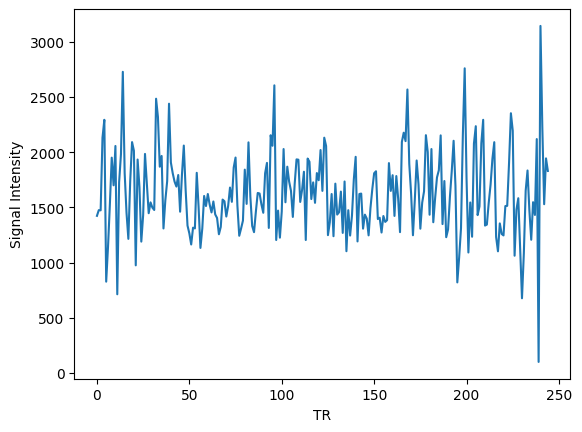

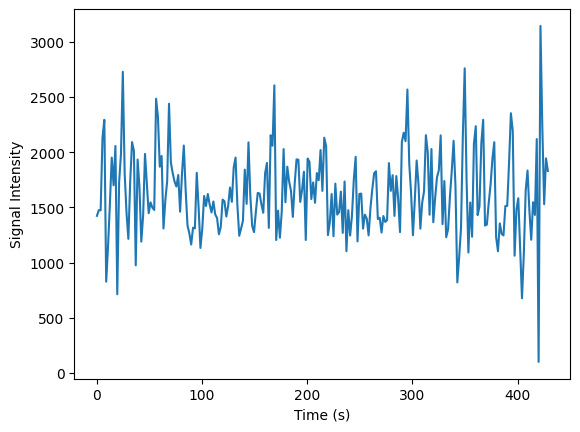

In [71]:
## plot the time series for index (100,100,50)
plt.plot(time_series_matrix[100*100+50][3:])
plt.xlabel('TR')
plt.ylabel('Signal Intensity')
plt.show()
num_trs=time_series.shape[1]
tr=1.75
time_points=np.linspace(0,num_trs*tr,num_trs)
plt.plot(time_points,time_series_matrix[100*100+50][3:])
plt.xlabel('Time (s)')
plt.ylabel('Signal Intensity')
plt.show()



In [45]:
test_data=data[:,:,30,0]
## save the test_data as a text file named test_data.txt
np.savetxt('test_data.txt',test_data)

'c:\\Users\\aghaffari\\Desktop\\lc_aging'